# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

02:38:01 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=870057;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=494749;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=655261;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=438187;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=832122;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=606969;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

02:38:04 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=977941;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=856891;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=126364;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=740715;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

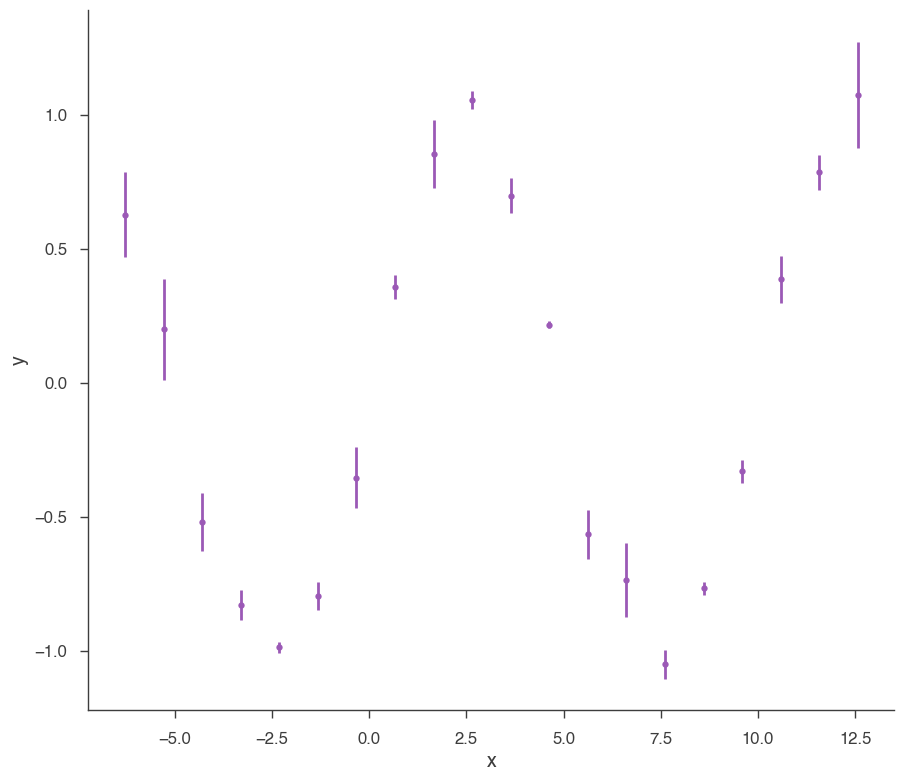

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

02:38:05 INFO      sampler set to emcee                                                    ]8;id=581024;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=252373;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

02:38:08 INFO      Mean acceptance fraction: 0.7078                                            ]8;id=336566;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=428130;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=619777;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=351616;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=196314;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=711115;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 +/- 0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0013 -0.0035 +0.0031) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.258783
total,-10.258783


Values of statistical measures:

,statistical measures
AIC,25.223449
BIC,26.509031
DIC,24.554094
PDIC,2.014721


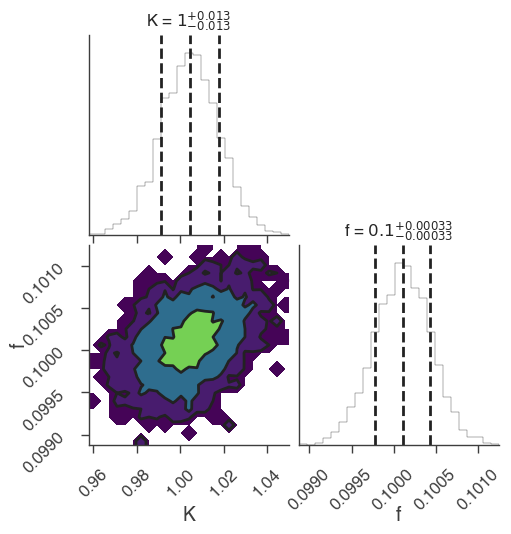

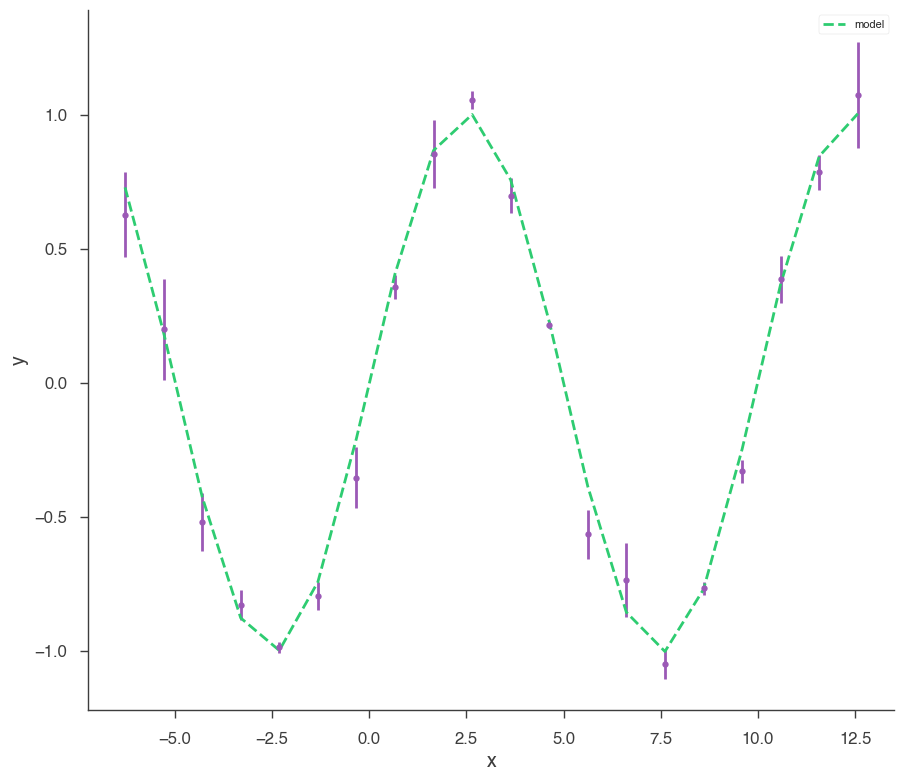

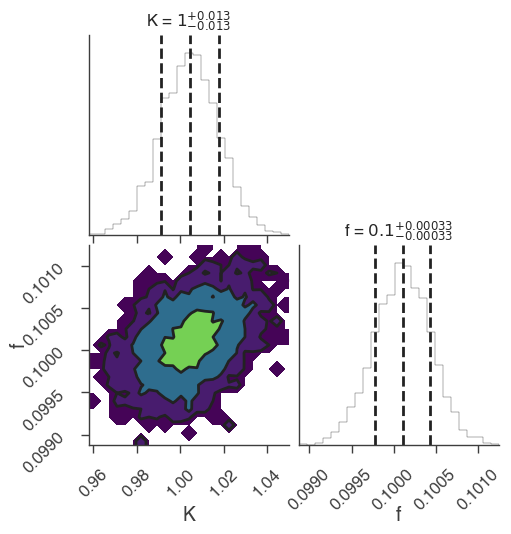

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

02:38:09 INFO      sampler set to multinest                                                ]8;id=139729;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=229805;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -20.253302518236044      +/-  0.14994017179283131     
 Total Likelihood Evaluations:         5556
 Sampling finished. Exiting MultiNest



02:38:10 INFO      fit restored to maximum of posterior                                         ]8;id=63720;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=903925;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=225524;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=113519;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.014 +0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0014 -0.0035 +0.0029) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.260038
total,-10.260038


Values of statistical measures:

,statistical measures
AIC,25.225958
BIC,26.511540
DIC,24.547661
PDIC,2.011887
log(Z),-8.795898


         INFO      deleting the chain directory chains                                     ]8;id=169049;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=320133;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

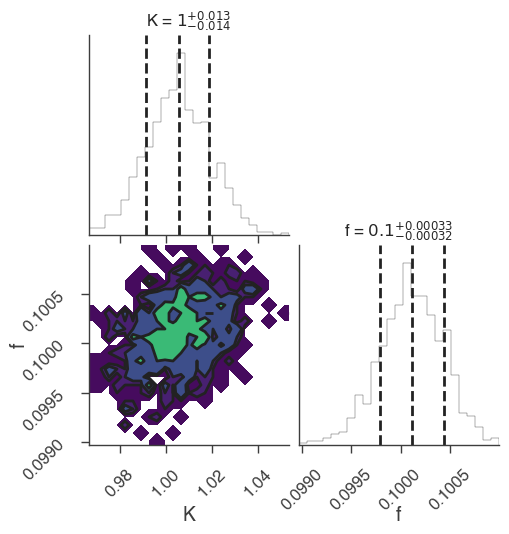

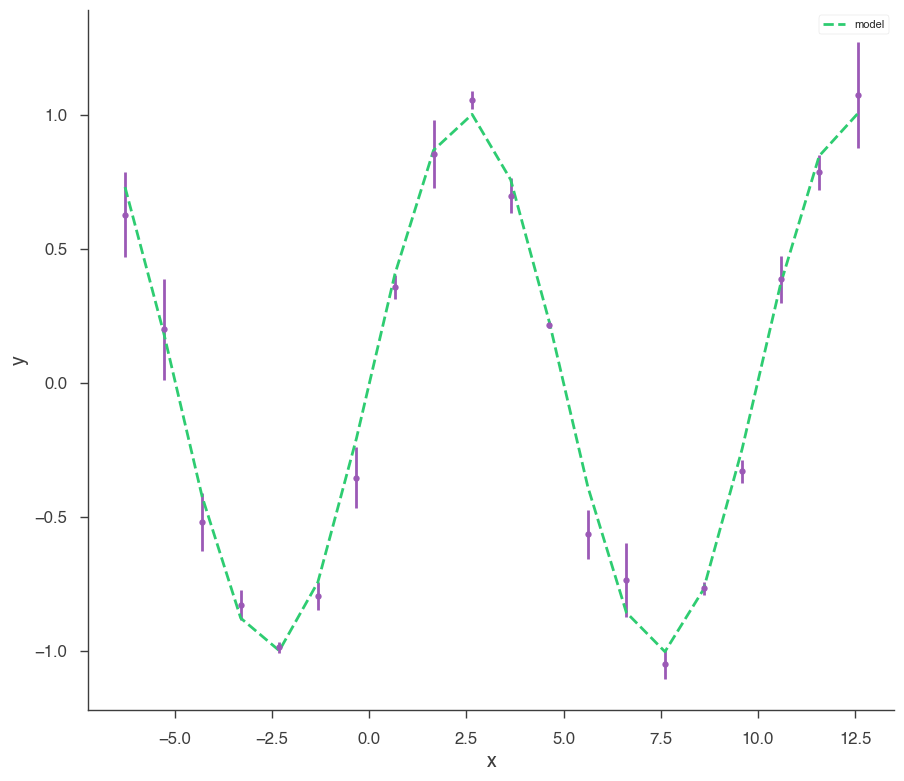

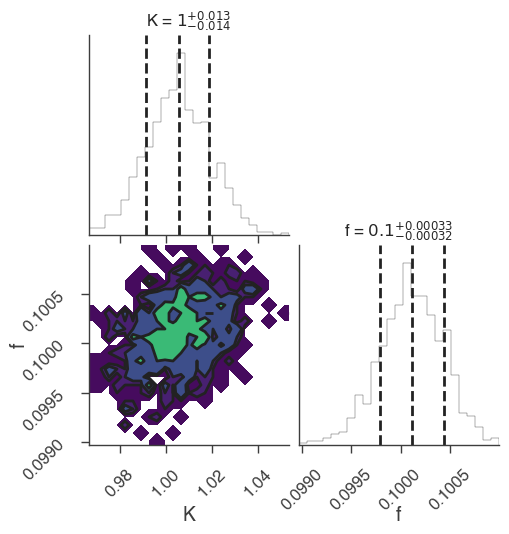

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

02:38:11 INFO      sampler set to dynesty_nested                                           ]8;id=216980;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=977392;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

220it [00:00, 2195.48it/s, bound: 0 | nc: 1 | ncall: 684 | eff(%): 32.164 | loglstar:   -inf < -5829.890 <    inf | logz: -5836.763 +/-  0.127 | dlogz: 5778.917 >  0.409]

440it [00:00, 1755.55it/s, bound: 0 | nc: 1 | ncall: 1173 | eff(%): 37.511 | loglstar:   -inf < -3931.526 <    inf | logz: -3939.309 +/-  0.139 | dlogz: 3907.752 >  0.409]

621it [00:00, 1684.31it/s, bound: 0 | nc: 8 | ncall: 1816 | eff(%): 34.196 | loglstar:   -inf < -3201.855 <    inf | logz: -3209.570 +/-  0.135 | dlogz: 3187.396 >  0.409]

792it [00:00, 1478.14it/s, bound: 0 | nc: 10 | ncall: 2681 | eff(%): 29.541 | loglstar:   -inf < -2693.316 <    inf | logz: -2701.955 +/-  0.146 | dlogz: 2682.224 >  0.409]

944it [00:00, 1219.92it/s, bound: 0 | nc: 1 | ncall: 3838 | eff(%): 24.596 | loglstar:   -inf < -2256.963 <    inf | logz: -2265.753 +/-  0.143 | dlogz: 2250.796 >  0.409] 

1073it [00:00, 821.06it/s, bound: 0 | nc: 6 | ncall: 5321 | eff(%): 20.165 | loglstar:   -inf < -1390.699 <    inf | logz: -1399.956 +/-  0.150 | dlogz: 1385.739 >  0.409]

1173it [00:01, 668.47it/s, bound: 0 | nc: 13 | ncall: 7014 | eff(%): 16.724 | loglstar:   -inf < -976.719 <    inf | logz: -984.927 +/-  0.141 | dlogz: 968.112 >  0.409]  

1254it [00:01, 580.49it/s, bound: 0 | nc: 4 | ncall: 8697 | eff(%): 14.419 | loglstar:   -inf < -806.302 <    inf | logz: -815.732 +/-  0.148 | dlogz: 799.765 >  0.409] 

1322it [00:01, 483.96it/s, bound: 0 | nc: 43 | ncall: 10455 | eff(%): 12.645 | loglstar:   -inf < -683.517 <    inf | logz: -692.698 +/-  0.142 | dlogz: 676.917 >  0.409]

1378it [00:01, 425.67it/s, bound: 0 | nc: 21 | ncall: 11866 | eff(%): 11.613 | loglstar:   -inf < -610.101 <    inf | logz: -619.212 +/-  0.145 | dlogz: 603.342 >  0.409]

1426it [00:02, 379.56it/s, bound: 0 | nc: 10 | ncall: 13428 | eff(%): 10.620 | loglstar:   -inf < -535.676 <    inf | logz: -544.898 +/-  0.148 | dlogz: 530.186 >  0.409]

1467it [00:02, 296.68it/s, bound: 1 | nc: 1 | ncall: 14603 | eff(%): 10.046 | loglstar:   -inf < -482.752 <    inf | logz: -492.765 +/-  0.153 | dlogz: 478.682 >  0.409] 

1640it [00:02, 530.31it/s, bound: 1 | nc: 3 | ncall: 14851 | eff(%): 11.043 | loglstar:   -inf < -349.327 <    inf | logz: -359.359 +/-  0.151 | dlogz: 344.109 >  0.409]

1793it [00:02, 593.36it/s, bound: 2 | nc: 1 | ncall: 15182 | eff(%): 11.810 | loglstar:   -inf < -256.917 <    inf | logz: -267.384 +/-  0.154 | dlogz: 251.823 >  0.409]

1981it [00:02, 827.63it/s, bound: 2 | nc: 1 | ncall: 15445 | eff(%): 12.826 | loglstar:   -inf < -178.802 <    inf | logz: -188.415 +/-  0.150 | dlogz: 171.622 >  0.409]

2171it [00:02, 892.42it/s, bound: 3 | nc: 1 | ncall: 15782 | eff(%): 13.756 | loglstar:   -inf < -123.604 <    inf | logz: -133.662 +/-  0.151 | dlogz: 117.540 >  0.409]

2284it [00:02, 938.70it/s, bound: 3 | nc: 3 | ncall: 15936 | eff(%): 14.332 | loglstar:   -inf < -94.016 <    inf | logz: -103.857 +/-  0.152 | dlogz: 87.586 >  0.409]  

2412it [00:03, 1013.74it/s, bound: 3 | nc: 1 | ncall: 16174 | eff(%): 14.913 | loglstar:   -inf < -68.850 <    inf | logz: -79.165 +/-  0.151 | dlogz: 62.820 >  0.409]

2527it [00:03, 934.24it/s, bound: 4 | nc: 1 | ncall: 16410 | eff(%): 15.399 | loglstar:   -inf < -54.503 <    inf | logz: -64.784 +/-  0.152 | dlogz: 48.122 >  0.409] 

2715it [00:03, 1156.41it/s, bound: 4 | nc: 6 | ncall: 16740 | eff(%): 16.219 | loglstar:   -inf < -38.239 <    inf | logz: -48.024 +/-  0.151 | dlogz: 30.809 >  0.409]

2844it [00:03, 986.68it/s, bound: 5 | nc: 1 | ncall: 17008 | eff(%): 16.722 | loglstar:   -inf < -30.331 <    inf | logz: -40.118 +/-  0.150 | dlogz: 22.756 >  0.409] 

3068it [00:03, 1272.97it/s, bound: 5 | nc: 3 | ncall: 17312 | eff(%): 17.722 | loglstar:   -inf < -21.885 <    inf | logz: -31.950 +/-  0.150 | dlogz: 14.061 >  0.409]

3213it [00:03, 1017.02it/s, bound: 6 | nc: 1 | ncall: 17611 | eff(%): 18.244 | loglstar:   -inf < -18.936 <    inf | logz: -28.824 +/-  0.150 | dlogz: 10.562 >  0.409]

3417it [00:03, 1234.62it/s, bound: 6 | nc: 5 | ncall: 17916 | eff(%): 19.072 | loglstar:   -inf < -15.666 <    inf | logz: -25.781 +/-  0.151 | dlogz:  7.006 >  0.409]

3563it [00:04, 1091.92it/s, bound: 7 | nc: 1 | ncall: 18206 | eff(%): 19.570 | loglstar:   -inf < -13.935 <    inf | logz: -24.166 +/-  0.152 | dlogz:  5.030 >  0.409]

3766it [00:04, 1298.52it/s, bound: 7 | nc: 3 | ncall: 18494 | eff(%): 20.363 | loglstar:   -inf < -12.467 <    inf | logz: -22.691 +/-  0.152 | dlogz:  3.088 >  0.409]

3916it [00:04, 1099.26it/s, bound: 8 | nc: 1 | ncall: 18806 | eff(%): 20.823 | loglstar:   -inf < -11.766 <    inf | logz: -21.993 +/-  0.152 | dlogz:  2.097 >  0.409]

4164it [00:04, 1400.47it/s, bound: 8 | nc: 1 | ncall: 19199 | eff(%): 21.689 | loglstar:   -inf < -11.112 <    inf | logz: -21.285 +/-  0.152 | dlogz:  1.062 >  0.409]

4328it [00:04, 1208.95it/s, bound: 9 | nc: 1 | ncall: 19507 | eff(%): 22.187 | loglstar:   -inf < -10.828 <    inf | logz: -21.016 +/-  0.152 | dlogz:  0.672 >  0.409]

4506it [00:04, 1334.38it/s, +19 | bound: 9 | nc: 1 | ncall: 19836 | eff(%): 22.834 | loglstar:   -inf < -10.608 <    inf | logz: -20.805 +/-  0.152 | dlogz:  0.387 >  0.409]

4506it [00:04, 925.17it/s, +400 | bound: 9 | nc: 1 | ncall: 20217 | eff(%): 24.757 | loglstar:   -inf < -10.255 <    inf | logz: -20.471 +/-  0.152 | dlogz:  0.001 >  0.409]

02:38:16 INFO      fit restored to maximum of posterior                                         ]8;id=416108;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=68165;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=880188;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=333007;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.004 -0.013 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0013 -0.0032 +0.0033) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.259808
total,-10.259808


Values of statistical measures:

,statistical measures
AIC,25.225499
BIC,26.511081
DIC,24.586335
PDIC,2.034232
log(Z),-8.890438


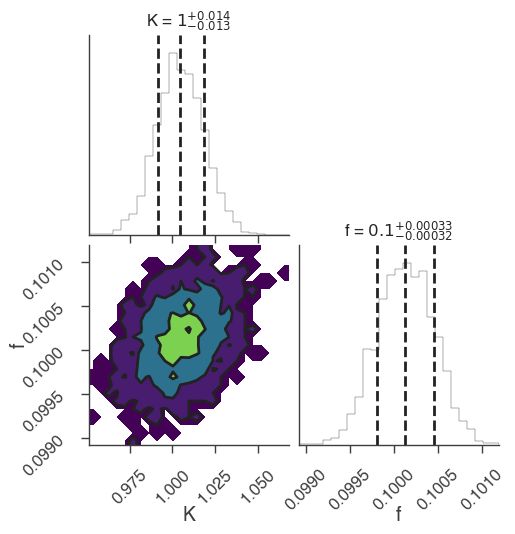

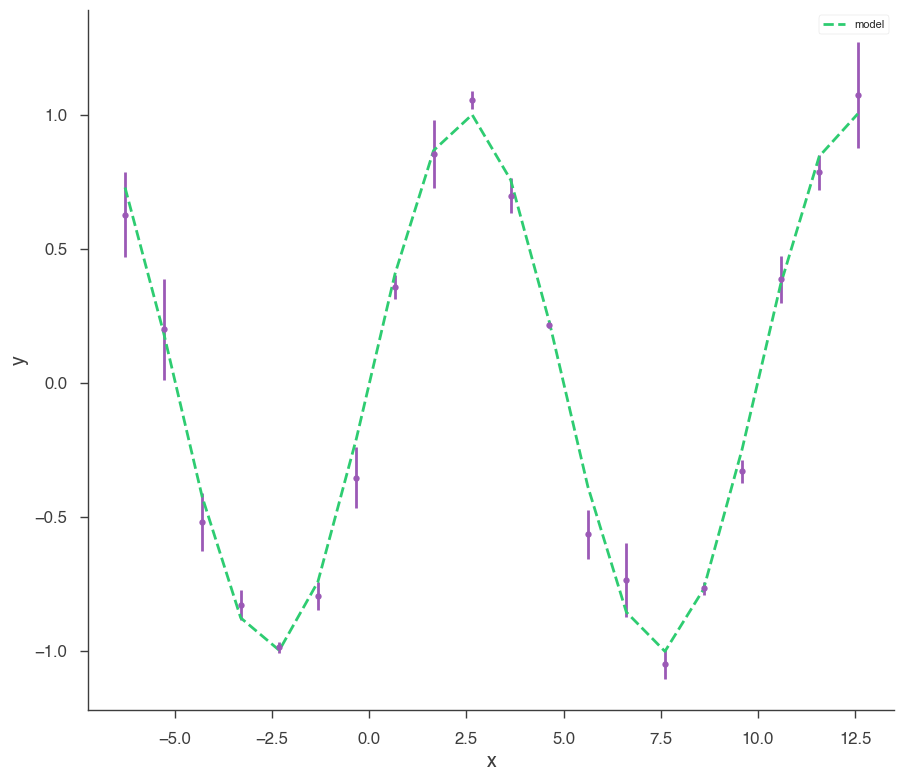

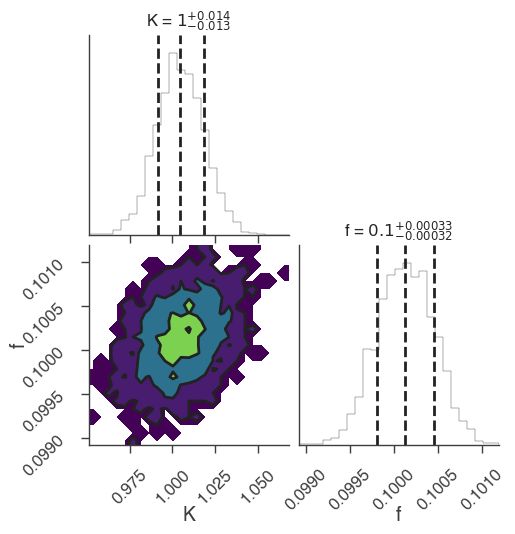

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

02:38:17 INFO      sampler set to dynesty_dynamic                                          ]8;id=107775;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=388395;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

122it [00:00, 1215.64it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 141 | eff(%): 19.033 | loglstar:   -inf < -8229.607 <    inf | logz: -8236.757 +/-  0.119 | dlogz: 8159.040 >  0.010]

319it [00:00, 1654.12it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 446 | eff(%): 33.721 | loglstar:   -inf < -5391.996 <    inf | logz: -5399.541 +/-  0.123 | dlogz: 5335.233 >  0.010]

485it [00:00, 1636.45it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 797 | eff(%): 37.394 | loglstar:   -inf < -4339.817 <    inf | logz: -4347.693 +/-  0.125 | dlogz: 4269.094 >  0.010]

649it [00:00, 1573.29it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1264 | eff(%): 36.791 | loglstar:   -inf < -3608.722 <    inf | logz: -3615.820 +/-  0.118 | dlogz: 3595.040 >  0.010]

807it [00:00, 1332.86it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 1886 | eff(%): 33.822 | loglstar:   -inf < -3153.232 <    inf | logz: -3161.675 +/-  0.128 | dlogz: 3142.797 >  0.010]

946it [00:00, 1154.24it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2701 | eff(%): 29.553 | loglstar:   -inf < -2811.703 <    inf | logz: -2819.735 +/-  0.121 | dlogz: 2798.318 >  0.010]

1068it [00:00, 942.83it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 3713 | eff(%): 25.350 | loglstar:   -inf < -2448.727 <    inf | logz: -2457.699 +/-  0.132 | dlogz: 2438.075 >  0.010]

1171it [00:01, 836.76it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 4581 | eff(%): 23.047 | loglstar:   -inf < -2231.900 <    inf | logz: -2241.144 +/-  0.136 | dlogz: 2233.337 >  0.010]

1261it [00:01, 699.12it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 5645 | eff(%): 20.521 | loglstar:   -inf < -1823.022 <    inf | logz: -1832.446 +/-  0.137 | dlogz: 1824.705 >  0.010] 

1338it [00:01, 652.61it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 6481 | eff(%): 19.166 | loglstar:   -inf < -1518.534 <    inf | logz: -1527.214 +/-  0.130 | dlogz: 1513.964 >  0.010]

1407it [00:01, 599.09it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 7482 | eff(%): 17.627 | loglstar:   -inf < -1274.533 <    inf | logz: -1283.700 +/-  0.129 | dlogz: 1270.236 >  0.010]

1470it [00:01, 528.88it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 8423 | eff(%): 16.474 | loglstar:   -inf < -1096.617 <    inf | logz: -1106.432 +/-  0.139 | dlogz: 1095.492 >  0.010]

1525it [00:01, 469.52it/s, batch: 0 | bound: 0 | nc: 77 | ncall: 9538 | eff(%): 15.192 | loglstar:   -inf < -943.332 <    inf | logz: -953.267 +/-  0.140 | dlogz: 942.677 >  0.010]   

1574it [00:02, 467.57it/s, batch: 0 | bound: 0 | nc: 44 | ncall: 10302 | eff(%): 14.571 | loglstar:   -inf < -839.261 <    inf | logz: -849.070 +/-  0.137 | dlogz: 836.346 >  0.010]

1622it [00:02, 412.03it/s, batch: 0 | bound: 0 | nc: 73 | ncall: 11349 | eff(%): 13.689 | loglstar:   -inf < -762.982 <    inf | logz: -773.070 +/-  0.140 | dlogz: 762.121 >  0.010]

1665it [00:02, 394.26it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 12309 | eff(%): 12.999 | loglstar:   -inf < -712.111 <    inf | logz: -721.206 +/-  0.128 | dlogz: 707.489 >  0.010] 

1705it [00:02, 337.67it/s, batch: 0 | bound: 0 | nc: 55 | ncall: 13525 | eff(%): 12.157 | loglstar:   -inf < -666.578 <    inf | logz: -676.209 +/-  0.131 | dlogz: 662.733 >  0.010]

1740it [00:02, 320.62it/s, batch: 0 | bound: 0 | nc: 82 | ncall: 14495 | eff(%): 11.604 | loglstar:   -inf < -628.009 <    inf | logz: -637.002 +/-  0.127 | dlogz: 622.949 >  0.010]

1773it [00:02, 302.91it/s, batch: 0 | bound: 0 | nc: 52 | ncall: 15479 | eff(%): 11.096 | loglstar:   -inf < -582.064 <    inf | logz: -591.160 +/-  0.132 | dlogz: 577.321 >  0.010]

1804it [00:02, 282.01it/s, batch: 0 | bound: 0 | nc: 43 | ncall: 16316 | eff(%): 10.728 | loglstar:   -inf < -556.776 <    inf | logz: -565.416 +/-  0.129 | dlogz: 551.137 >  0.010]

1833it [00:03, 188.99it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17910 | eff(%):  9.957 | loglstar:   -inf < -533.090 <    inf | logz: -542.368 +/-  0.130 | dlogz: 528.342 >  0.010] 

2034it [00:03, 523.64it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18184 | eff(%): 10.886 | loglstar:   -inf < -378.347 <    inf | logz: -388.276 +/-  0.134 | dlogz: 373.880 >  0.010]

2261it [00:03, 886.36it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18621 | eff(%): 11.825 | loglstar:   -inf < -252.047 <    inf | logz: -261.447 +/-  0.133 | dlogz: 246.229 >  0.010]

2383it [00:03, 789.61it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18780 | eff(%): 12.360 | loglstar:   -inf < -204.905 <    inf | logz: -215.411 +/-  0.137 | dlogz: 200.224 >  0.010]

2571it [00:03, 1019.57it/s, batch: 0 | bound: 2 | nc: 6 | ncall: 19101 | eff(%): 13.117 | loglstar:   -inf < -146.050 <    inf | logz: -155.475 +/-  0.132 | dlogz: 139.503 >  0.010]

2718it [00:03, 905.00it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19413 | eff(%): 13.649 | loglstar:   -inf < -109.770 <    inf | logz: -120.030 +/-  0.134 | dlogz: 103.832 >  0.010] 

2924it [00:03, 1146.26it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 19713 | eff(%): 14.466 | loglstar:   -inf < -77.017 <    inf | logz: -87.186 +/-  0.134 | dlogz: 71.139 >  0.010]  

3097it [00:04, 1280.19it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 20073 | eff(%): 15.054 | loglstar:   -inf < -59.669 <    inf | logz: -69.529 +/-  0.133 | dlogz: 53.066 >  0.010]

3247it [00:04, 1041.91it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20325 | eff(%): 15.592 | loglstar:   -inf < -47.338 <    inf | logz: -57.369 +/-  0.134 | dlogz: 40.597 >  0.010]

3483it [00:04, 1325.88it/s, batch: 0 | bound: 4 | nc: 5 | ncall: 20768 | eff(%): 16.377 | loglstar:   -inf < -32.989 <    inf | logz: -42.965 +/-  0.135 | dlogz: 25.691 >  0.010]

3642it [00:04, 1031.29it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21048 | eff(%): 16.902 | loglstar:   -inf < -27.267 <    inf | logz: -37.511 +/-  0.134 | dlogz: 19.917 >  0.010]

3832it [00:04, 1204.25it/s, batch: 0 | bound: 5 | nc: 5 | ncall: 21374 | eff(%): 17.519 | loglstar:   -inf < -21.686 <    inf | logz: -31.856 +/-  0.135 | dlogz: 13.964 >  0.010]

3980it [00:04, 982.21it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21697 | eff(%): 17.930 | loglstar:   -inf < -18.743 <    inf | logz: -28.929 +/-  0.135 | dlogz: 10.735 >  0.010] 

4170it [00:05, 1163.62it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21977 | eff(%): 18.552 | loglstar:   -inf < -16.037 <    inf | logz: -26.093 +/-  0.135 | dlogz:  7.513 >  0.010]

4317it [00:05, 1230.62it/s, batch: 0 | bound: 6 | nc: 4 | ncall: 22280 | eff(%): 18.951 | loglstar:   -inf < -14.610 <    inf | logz: -24.711 +/-  0.134 | dlogz:  5.837 >  0.010]

4462it [00:05, 932.36it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22524 | eff(%): 19.380 | loglstar:   -inf < -13.553 <    inf | logz: -23.645 +/-  0.135 | dlogz:  4.492 >  0.010] 

4690it [00:05, 1199.96it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22890 | eff(%): 20.051 | loglstar:   -inf < -12.388 <    inf | logz: -22.470 +/-  0.135 | dlogz:  2.906 >  0.010]

4841it [00:05, 1036.51it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23205 | eff(%): 20.422 | loglstar:   -inf < -11.795 <    inf | logz: -21.930 +/-  0.135 | dlogz:  2.133 >  0.010]

5046it [00:05, 1244.33it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23488 | eff(%): 21.036 | loglstar:   -inf < -11.320 <    inf | logz: -21.415 +/-  0.135 | dlogz:  1.374 >  0.010]

5247it [00:05, 1416.92it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23904 | eff(%): 21.501 | loglstar:   -inf < -10.962 <    inf | logz: -21.077 +/-  0.135 | dlogz:  0.879 >  0.010]

5413it [00:06, 1202.95it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24123 | eff(%): 21.984 | loglstar:   -inf < -10.774 <    inf | logz: -20.883 +/-  0.135 | dlogz:  0.605 >  0.010]

5630it [00:06, 1416.89it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24531 | eff(%): 22.492 | loglstar:   -inf < -10.584 <    inf | logz: -20.707 +/-  0.135 | dlogz:  0.373 >  0.010]

5795it [00:06, 1162.46it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24793 | eff(%): 22.911 | loglstar:   -inf < -10.490 <    inf | logz: -20.616 +/-  0.135 | dlogz:  0.260 >  0.010]

5966it [00:06, 1278.86it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25069 | eff(%): 23.333 | loglstar:   -inf < -10.415 <    inf | logz: -20.548 +/-  0.135 | dlogz:  0.180 >  0.010]

6134it [00:06, 1371.24it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25425 | eff(%): 23.661 | loglstar:   -inf < -10.368 <    inf | logz: -20.500 +/-  0.135 | dlogz:  0.126 >  0.010]

6288it [00:06, 1111.70it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25638 | eff(%): 24.057 | loglstar:   -inf < -10.336 <    inf | logz: -20.469 +/-  0.135 | dlogz:  0.091 >  0.010]

6480it [00:06, 1288.80it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 26027 | eff(%): 24.428 | loglstar:   -inf < -10.309 <    inf | logz: -20.441 +/-  0.135 | dlogz:  0.061 >  0.010]

6629it [00:07, 1048.67it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26276 | eff(%): 24.757 | loglstar:   -inf < -10.294 <    inf | logz: -20.425 +/-  0.135 | dlogz:  0.045 >  0.010]

6798it [00:07, 1182.99it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26532 | eff(%): 25.148 | loglstar:   -inf < -10.282 <    inf | logz: -20.413 +/-  0.135 | dlogz:  0.032 >  0.010]

6936it [00:07, 1179.02it/s, batch: 0 | bound: 12 | nc: 5 | ncall: 26852 | eff(%): 25.358 | loglstar:   -inf < -10.276 <    inf | logz: -20.405 +/-  0.135 | dlogz:  0.024 >  0.010]

7068it [00:07, 859.94it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27080 | eff(%): 25.627 | loglstar:   -inf < -10.271 <    inf | logz: -20.399 +/-  0.135 | dlogz:  0.019 >  0.010] 

7211it [00:07, 971.56it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27326 | eff(%): 25.915 | loglstar:   -inf < -10.266 <    inf | logz: -20.395 +/-  0.135 | dlogz:  0.014 >  0.010]

7366it [00:07, 1095.05it/s, batch: 0 | bound: 13 | nc: 5 | ncall: 27659 | eff(%): 26.159 | loglstar:   -inf < -10.263 <    inf | logz: -20.391 +/-  0.135 | dlogz:  0.010 >  0.010]

7495it [00:08, 900.08it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27808 | eff(%): 26.587 | loglstar:   -inf < -10.261 <    inf | logz: -20.389 +/-  0.135 | dlogz:  0.008 >  0.010] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7877it [00:08, 567.45it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 28190 | eff(%): 27.943 | loglstar: -12.151 < -11.800 < -10.742 | logz: -20.381 +/-  0.139 | stop:  1.513]         

8046it [00:09, 681.02it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28420 | eff(%): 27.767 | loglstar: -12.151 < -11.599 < -10.742 | logz: -20.381 +/-  0.139 | stop:  1.513]

8203it [00:09, 793.01it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 28682 | eff(%): 28.055 | loglstar: -12.151 < -11.220 < -10.742 | logz: -20.381 +/-  0.139 | stop:  1.513]

8329it [00:09, 711.19it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28958 | eff(%): 28.220 | loglstar: -12.151 < -10.974 < -10.742 | logz: -20.381 +/-  0.139 | stop:  1.513]

8524it [00:09, 899.70it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29214 | eff(%): 28.632 | loglstar: -12.151 < -10.747 < -10.742 | logz: -20.381 +/-  0.139 | stop:  1.513]

8998it [00:09, 1585.59it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29750 | eff(%): 30.211 | loglstar: -12.151 < -10.286 < -10.742 | logz: -20.381 +/-  0.139 | stop:  1.513]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9232it [00:10, 595.65it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30014 | eff(%): 30.324 | loglstar: -12.631 < -11.758 < -12.139 | logz: -20.375 +/-  0.114 | stop:  1.106] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9637it [00:11, 611.07it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30445 | eff(%): 31.654 | loglstar: -12.631 < -10.255 < -12.139 | logz: -20.375 +/-  0.114 | stop:  0.929]

9637it [00:11, 855.16it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30445 | eff(%): 31.654 | loglstar: -12.631 < -10.255 < -12.139 | logz: -20.375 +/-  0.114 | stop:  0.929]

02:38:28 INFO      fit restored to maximum of posterior                                         ]8;id=722326;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=440517;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=226891;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=348222;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 +/- 0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0013 -0.0032 +0.0031) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.258712
total,-10.258712


Values of statistical measures:

,statistical measures
AIC,25.223307
BIC,26.508889
DIC,24.484407
PDIC,1.983264
log(Z),-8.842093


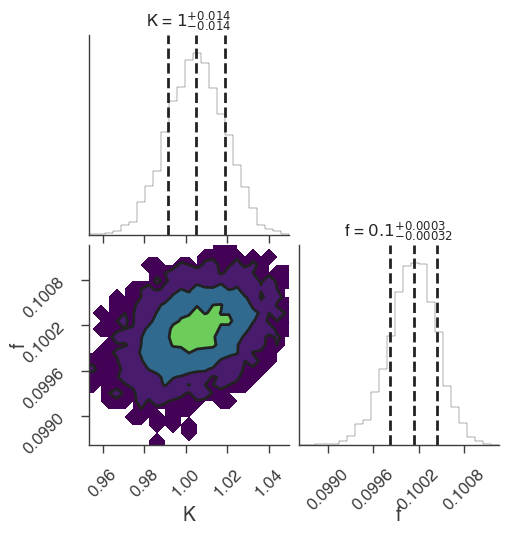

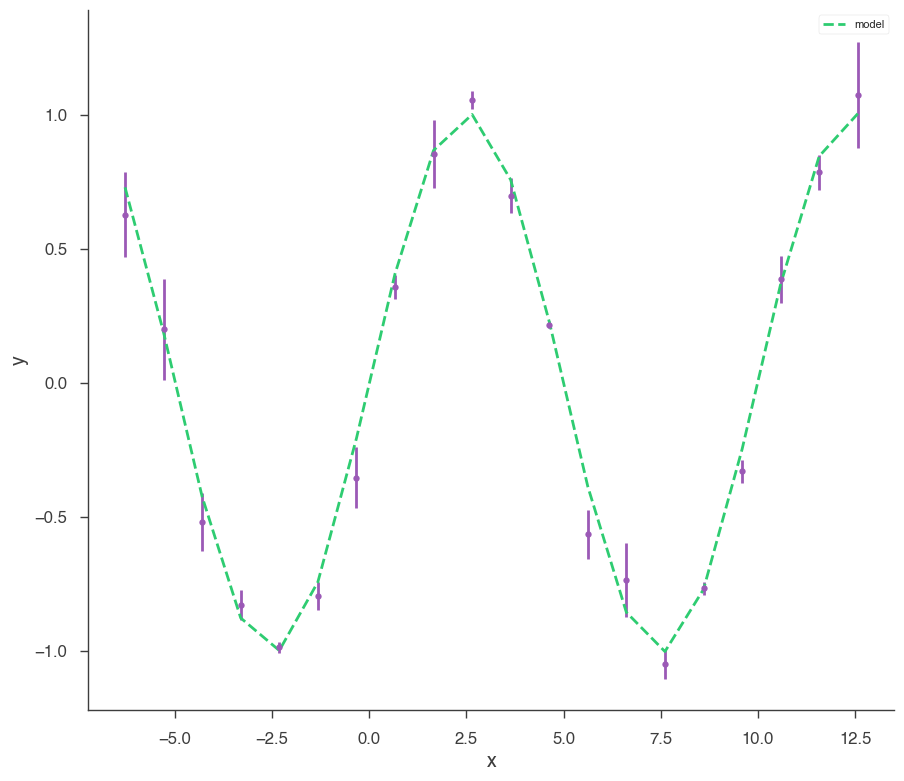

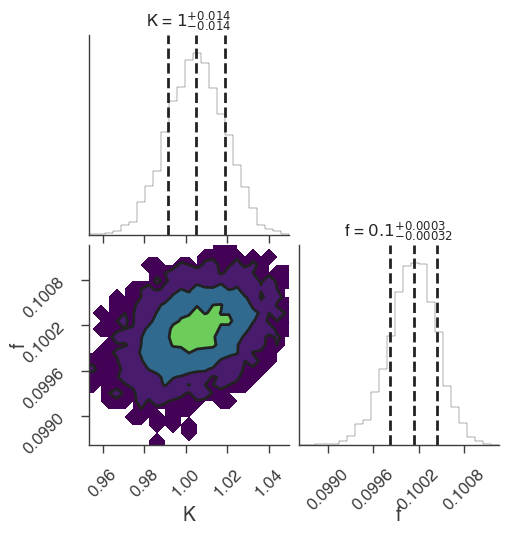

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

02:38:29 INFO      sampler set to zeus                                                     ]8;id=710186;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=983955;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:14, 44.19it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:16, 37.79it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:13, 44.69it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:23, 25.88it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:20, 28.77it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:19, 31.18it/s]

Sampling progress :   5%|▌         | 33/625 [00:01<00:25, 23.53it/s]

Sampling progress :   6%|▌         | 38/625 [00:01<00:20, 28.28it/s]

Sampling progress :   7%|▋         | 43/625 [00:01<00:18, 32.01it/s]

Sampling progress :   8%|▊         | 48/625 [00:01<00:16, 34.34it/s]

Sampling progress :   8%|▊         | 52/625 [00:01<00:16, 34.86it/s]

Sampling progress :   9%|▉         | 58/625 [00:01<00:13, 40.53it/s]

Sampling progress :  10%|█         | 63/625 [00:01<00:14, 40.13it/s]

Sampling progress :  11%|█         | 68/625 [00:01<00:13, 41.07it/s]

Sampling progress :  12%|█▏        | 73/625 [00:02<00:13, 40.04it/s]

Sampling progress :  12%|█▏        | 78/625 [00:02<00:13, 41.63it/s]

Sampling progress :  13%|█▎        | 83/625 [00:02<00:17, 31.33it/s]

Sampling progress :  14%|█▍        | 88/625 [00:02<00:17, 31.55it/s]

Sampling progress :  15%|█▌        | 94/625 [00:02<00:14, 36.69it/s]

Sampling progress :  16%|█▌        | 99/625 [00:02<00:15, 33.04it/s]

Sampling progress :  16%|█▋        | 103/625 [00:03<00:19, 27.14it/s]

Sampling progress :  17%|█▋        | 107/625 [00:03<00:17, 28.87it/s]

Sampling progress :  18%|█▊        | 112/625 [00:03<00:15, 32.24it/s]

Sampling progress :  19%|█▊        | 116/625 [00:03<00:15, 32.46it/s]

Sampling progress :  19%|█▉        | 120/625 [00:03<00:16, 30.60it/s]

Sampling progress :  20%|██        | 125/625 [00:03<00:14, 34.44it/s]

Sampling progress :  21%|██        | 131/625 [00:03<00:12, 40.38it/s]

Sampling progress :  22%|██▏       | 137/625 [00:03<00:11, 43.70it/s]

Sampling progress :  23%|██▎       | 142/625 [00:04<00:11, 43.10it/s]

Sampling progress :  24%|██▎       | 147/625 [00:04<00:11, 43.33it/s]

Sampling progress :  24%|██▍       | 153/625 [00:04<00:10, 47.06it/s]

Sampling progress :  25%|██▌       | 159/625 [00:04<00:09, 49.39it/s]

Sampling progress :  26%|██▋       | 165/625 [00:04<00:08, 51.18it/s]

Sampling progress :  28%|██▊       | 173/625 [00:04<00:07, 58.28it/s]

Sampling progress :  29%|██▊       | 179/625 [00:04<00:07, 56.22it/s]

Sampling progress :  30%|██▉       | 185/625 [00:04<00:07, 56.68it/s]

Sampling progress :  31%|███       | 191/625 [00:04<00:07, 56.77it/s]

Sampling progress :  32%|███▏      | 197/625 [00:05<00:07, 56.54it/s]

Sampling progress :  33%|███▎      | 205/625 [00:05<00:06, 62.62it/s]

Sampling progress :  34%|███▍      | 212/625 [00:05<00:06, 61.22it/s]

Sampling progress :  35%|███▌      | 219/625 [00:05<00:07, 56.63it/s]

Sampling progress :  36%|███▌      | 225/625 [00:05<00:07, 56.30it/s]

Sampling progress :  37%|███▋      | 232/625 [00:05<00:06, 59.20it/s]

Sampling progress :  39%|███▊      | 241/625 [00:05<00:05, 65.68it/s]

Sampling progress :  40%|███▉      | 249/625 [00:05<00:05, 69.38it/s]

Sampling progress :  41%|████      | 257/625 [00:05<00:05, 68.33it/s]

Sampling progress :  42%|████▏     | 264/625 [00:06<00:05, 67.37it/s]

Sampling progress :  43%|████▎     | 271/625 [00:06<00:05, 66.31it/s]

Sampling progress :  44%|████▍     | 278/625 [00:06<00:05, 62.84it/s]

Sampling progress :  46%|████▌     | 285/625 [00:06<00:05, 61.56it/s]

Sampling progress :  47%|████▋     | 293/625 [00:06<00:05, 65.06it/s]

Sampling progress :  48%|████▊     | 300/625 [00:06<00:04, 66.22it/s]

Sampling progress :  49%|████▉     | 307/625 [00:06<00:04, 66.50it/s]

Sampling progress :  51%|█████     | 316/625 [00:06<00:04, 70.93it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:06<00:04, 71.81it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:07<00:04, 67.35it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:07<00:04, 68.45it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:07<00:04, 58.85it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:07<00:04, 60.65it/s]

Sampling progress :  58%|█████▊    | 361/625 [00:07<00:04, 59.58it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:07<00:04, 59.26it/s]

Sampling progress :  60%|██████    | 375/625 [00:07<00:04, 60.24it/s]

Sampling progress :  61%|██████    | 382/625 [00:07<00:04, 58.93it/s]

Sampling progress :  62%|██████▏   | 389/625 [00:08<00:03, 61.72it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:08<00:03, 68.09it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:08<00:03, 61.01it/s]

Sampling progress :  66%|██████▌   | 412/625 [00:08<00:03, 58.32it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:08<00:03, 60.69it/s]

Sampling progress :  68%|██████▊   | 426/625 [00:08<00:03, 57.11it/s]

Sampling progress :  69%|██████▉   | 433/625 [00:08<00:03, 59.88it/s]

Sampling progress :  70%|███████   | 440/625 [00:08<00:02, 62.52it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:09<00:02, 65.01it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:09<00:02, 64.84it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:09<00:02, 65.84it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:09<00:02, 68.23it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:09<00:02, 65.15it/s]

Sampling progress :  77%|███████▋  | 484/625 [00:09<00:02, 63.35it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:09<00:02, 64.76it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:09<00:01, 67.38it/s]

Sampling progress :  81%|████████  | 507/625 [00:09<00:01, 69.81it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:10<00:01, 64.87it/s]

Sampling progress :  84%|████████▎ | 522/625 [00:10<00:01, 64.25it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:10<00:01, 58.89it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:10<00:01, 62.70it/s]

Sampling progress :  87%|████████▋ | 544/625 [00:10<00:01, 63.17it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:10<00:01, 62.52it/s]

Sampling progress :  89%|████████▉ | 559/625 [00:10<00:01, 65.65it/s]

Sampling progress :  91%|█████████ | 566/625 [00:10<00:00, 63.82it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:11<00:00, 59.11it/s]

Sampling progress :  93%|█████████▎| 580/625 [00:11<00:00, 61.93it/s]

Sampling progress :  94%|█████████▍| 588/625 [00:11<00:00, 66.00it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:11<00:00, 67.05it/s]

Sampling progress :  96%|█████████▋| 602/625 [00:11<00:00, 66.21it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:11<00:00, 68.09it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:11<00:00, 66.15it/s]

Sampling progress : 100%|██████████| 625/625 [00:11<00:00, 68.12it/s]

Sampling progress : 100%|██████████| 625/625 [00:11<00:00, 53.20it/s]

02:38:42 INFO      fit restored to maximum of posterior                                         ]8;id=787537;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=815156;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=138095;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=175894;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 14


Scale Factor: 0.958585


Mean Integrated Autocorrelation Time: 3.55


Effective Sample Size: 3525.27


Number of Log Probability Evaluations: 67406


Effective Samples per Log Probability Evaluation: 0.052299


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.014 +0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0014 -0.0033 +0.0029) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.258832
total,-10.258832


Values of statistical measures:

,statistical measures
AIC,25.223545
BIC,26.509128
DIC,24.481965
PDIC,1.981149


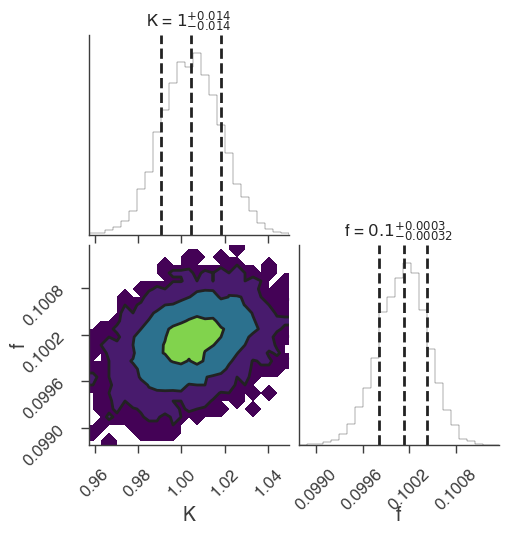

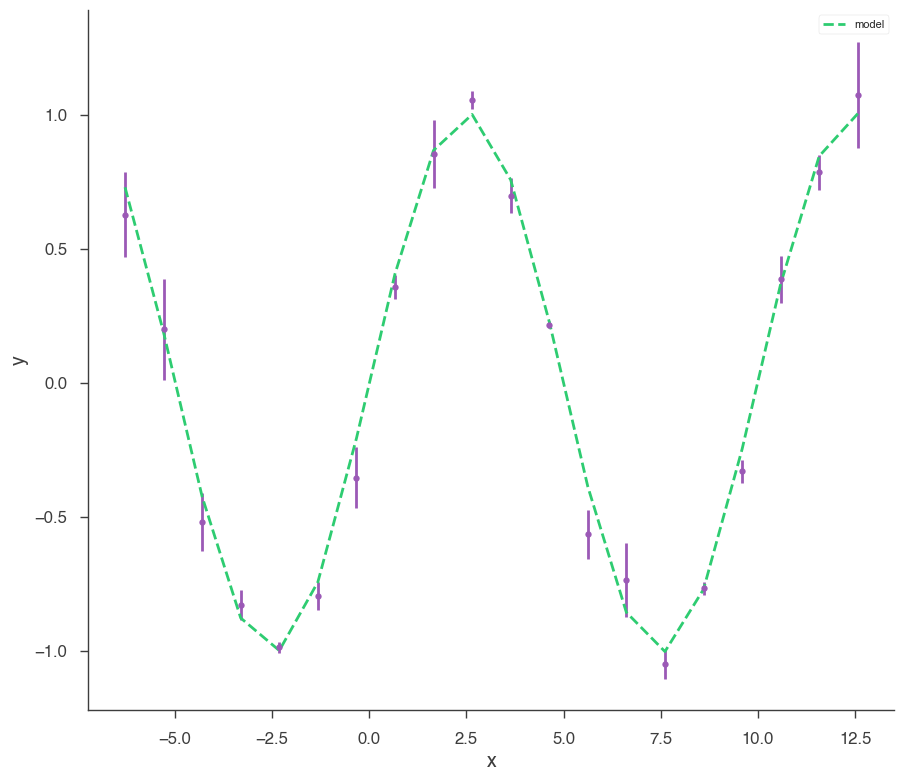

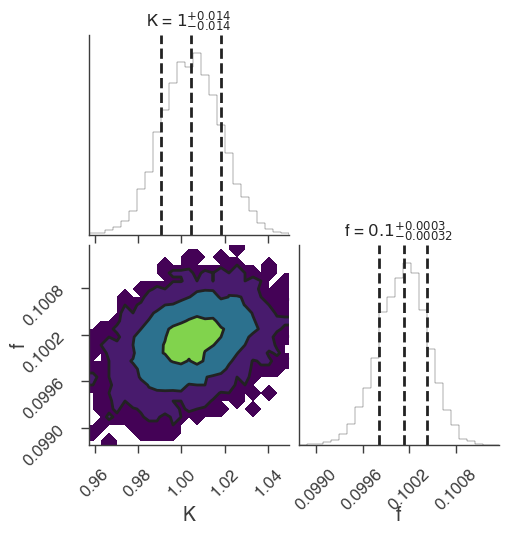

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

         INFO      sampler set to ultranest                                                ]8;id=140939;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=867656;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 8271


[ultranest]   logZ = -19.98 +- 0.1113


[ultranest] Effective samples strategy satisfied (ESS = 982.3, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


02:38:53 INFO      fit restored to maximum of posterior                                         ]8;id=414672;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=553295;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=439015;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=342115;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.015 +0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0016 -0.004 +0.0029) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.263919
total,-10.263919


Values of statistical measures:

,statistical measures
AIC,25.233721
BIC,26.519303
DIC,24.699321
PDIC,2.088094
log(Z),-8.679056


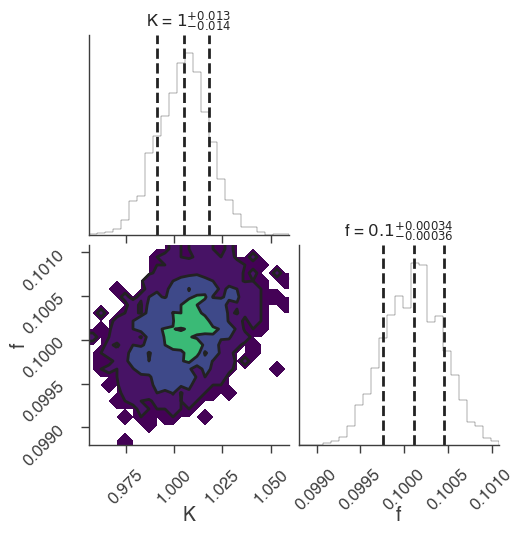

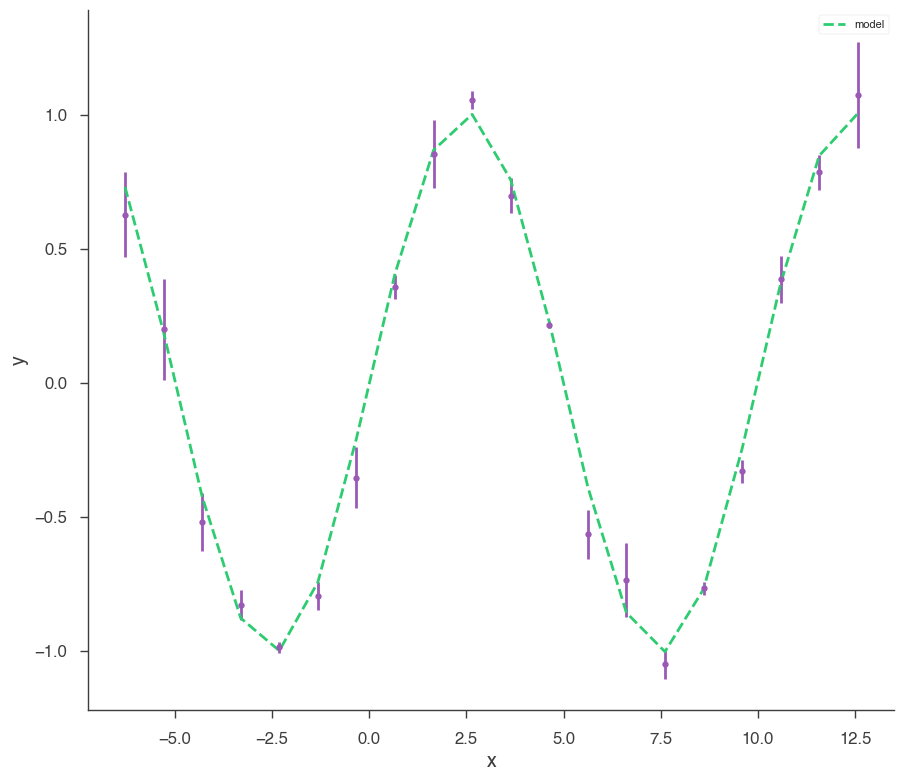

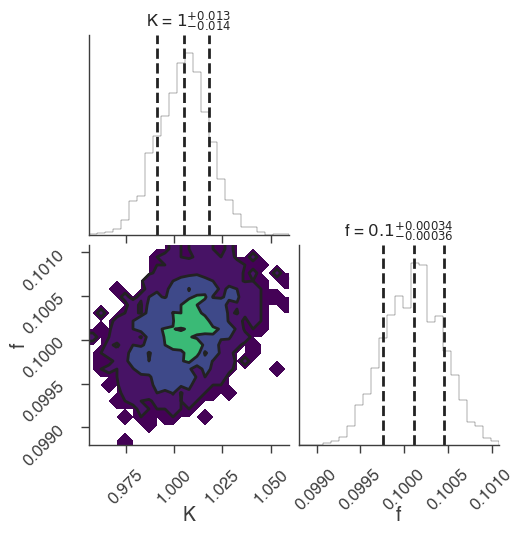

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()